### [MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv](https://data.ny.gov/Transportation/MTA-Subway-Trains-Delayed-Beginning-2020/wx2t-qtaz/about_data)
Columns: 
- __month__: The month in which subway trains delayed is being calculated (yyyy-mm-dd).
- __division__: The A Division (numbered subway lines), B Division (lettered subway lines) and systemwide.
- __line__: Each subway line (1, 2, 3, 4, 5, 6, 7, A, C, E, B, D, F, M, G, J, Z, L, N, Q, R, W, S 42nd, S Rock, S Fkln).
- __day_type__: Represents weekday as 1 and weekend as 2.
- __reporting_category__: The six categories that delays are reported under: Infrastructure & equipment, Crew availability, Police & medical, External Factors, Operating conditions, Planned ROW work. 
- __subcategory__: The sub-categories that fall under the definition of Delays: Braking; Door-Related; Fire, Smoke, Debris; Inclement Weather; Crew Availability; Insufficient Supplement Schedule; Propulsion; Public Conduct, Crime, Police Response; Rail and Roadbed; Persons on Roadbed; Service Delivery; Sick/Injured Customer; Train Brake Activation - Cause Unknown; Subways Maintenance; Work Equipment; Capital Work - Other Planned ROW; External Debris on Roadbed; External Agency or Utility; Capital Work - Other Planned ROW; Other – CE; Other – Sig; Other Infrastructure; Other Internal Disruptions.
- __delays__: The number of train delays per category and time period.

### [MTA Subway Customer Journey-Focused Metrics: Beginning 2020](https://data.ny.gov/Transportation/MTA-Subway-Customer-Journey-Focused-Metrics-Beginn/4apg-4kt9/about_data)
- __month__: The month in which the metrics are being calculated (yyyy-mm-dd).

- __division__: The A Division (numbered subway lines and S 42nd) and B Division (lettered subway lines).

- __line__: Each subway line (1, 2, 3, 4, 5, 6, 7, A, C, E, B, D, F, M, G, JZ, L, N, Q, R, W, S 42nd, S Rock, S Fkln). A systemwide row also exists for each month in the dataset.

- __period__: Represents both the peak and off-peak service periods.

- __num_passengers__: Total number of passengers reported each month and on each line.

- __additional platform time__: The average additional time in minutes (above scheduled time) customers wait for their train, reported each month and on each line.

- __additional train time__: The average additional time in minutes (above scheduled time) customers spend onboard a train, reported each month and on each line.

- __total_apt__: The total number of additional time in minutes (above scheduled time) customers wait for their train, reported each month and on each line.

- __total_att__: The total number of average additional time in minutes (above scheduled time) customers spend onboard a train, reported each month and on each line.

- __over_five_mins__: The estimated total number of customers whose journeys are not completed within 5 minutes of the scheduled time, reported each month and on each line

- __over_five_mins_perc__: The estimated percentage of customers whose journeys are not completed within 5 minutes of the scheduled time, reported each month and on each line.

- __customer journey time performance__: The estimated percentage of customers whose journeys are completed within 5 minutes of the scheduled time, reported each month and on each line.


# Data Analysis

# Global Variables

In [1]:
class ColorShapePair:
    def __init__(self, color, shape):
        self.color = color
        self.shape = shape

line_colors_shapes = {
    "1": ColorShapePair("red", "o"),
    "2": ColorShapePair("red", "s"),
    "3": ColorShapePair("red", "^"),
    "4": ColorShapePair("green", "o"),
    "5": ColorShapePair("green", "s"),
    "6": ColorShapePair("green", "^"),
    "7": ColorShapePair("purple", "o"),
    "A": ColorShapePair("blue", "o"),
    "C": ColorShapePair("blue", "s"),
    "E": ColorShapePair("blue", "^"),
    "B": ColorShapePair("orange", "o"),
    "D": ColorShapePair("orange", "s"),
    "F": ColorShapePair("orange", "^"),
    "M": ColorShapePair("orange", "*"),
    "G": ColorShapePair("lightgreen", "o"),
    "J": ColorShapePair("brown", "o"),
    "Z": ColorShapePair("brown", "s"),
    "JZ":ColorShapePair( "brown", "^"),
    "L": ColorShapePair("gray", "o"),
    "N": ColorShapePair("gold", "o"),
    "Q": ColorShapePair("gold", "s"),
    "R": ColorShapePair("gold", "^"),
    "W": ColorShapePair("gold", "*"),
    "S Fkln": ColorShapePair("lightgray", "o"),
    "S Rock": ColorShapePair("lightgray", "s"),
    "GS": ColorShapePair("lightgray", "^"),

}
metric_colors = {
    "num_passengers": "red",
    "additional platform time": "blue",
    "additional train time": "green",
    "total_apt": "teal",
    "total_att": "orange",
    "over_five_mins": "magenta",
    "over_five_mins_perc": "purple",
    "customer journey time performance": "sienna",
}
    
category_colors = {
    "Braking": "red",
    "Capital Work - Other Planned ROW": "wheat",
    "Crew Availability": "orange",
    "Door-Related": "yellow",
    "External Agency or Utility": "gray",
    "External Debris on Roadbed": "aqua",
    "Fire, Smoke, Debris": "darkred",
    "Inclement Weather": "lightgray",
    "Insufficient Supplement Schedule": "skyblue",
    "Operating Conditions": "lightgreen",
    "Other - CE": "magenta",
    "Other - Sig": "salmon",
    "Other Infrastructure": "teal",
    "Other Internal Disruptions": "violet",
    "Other Operating Environment": "green",
    "Other Planned ROW Work": "darkslategray",
    "Persons on Roadbed": "powderblue",
    "Propulsion": "purple",
    "Public Conduct, Crime, Police Response": "royalblue",
    "Rail and Roadbed": "sienna",
    "Service Delivery": "lime",
    "Service Management": "navy",
    "Sick/Injured Customer": "pink",
    "Signal Modernization Capital Project": "gold",
    "Subways Maintenance": "olive",
    "Train Brake Activation - Cause Unknown": "crimson",
    "Work Equipment": "steelblue",
}

figure_num = 5
def get_figure_label():
    global figure_num
    figure_num += 1
    return "Figure " + str(figure_num - 1)

# Load and clean the delay data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

delays_file = "MTA_Subway_Trains_Delayed__Beginning_2020_20241117.csv"
df = pd.read_csv(delays_file)

# replace missing subcategories with reporting_category
df['subcategory'] = df['subcategory'].fillna(df['reporting_category'])

# replace "Other Operating Environment" with "Operating Conditions" to maintain parity
# a new "Service Management" subcategory was added in Aug 2024 which
# replaces the empty subcategory for "Operating Conditions"
df['subcategory'] = df['subcategory'].replace("Other Operating Environment", "Operating Conditions")

# drop the division and reporting_category columns, they are redundance info
df = df.drop(columns=['division', 'reporting_category'])

# remove S Rock, S Fkln, and GS (shuttles)
df = df[~df['line'].isin(['S Rock', 'S Fkln', 'GS'])]

df

,month,line,day_type,subcategory,delays
0,2024-10-01,1,1,Crew Availability,60
1,2024-10-01,1,1,External Debris on Roadbed,17
2,2024-10-01,1,1,Braking,20
3,2024-10-01,1,1,Door-Related,43
4,2024-10-01,1,1,"Fire, Smoke, Debris",30
...,...,...,...,...,...
39025,2020-01-01,R,2,Subways Maintenance,23
39026,2020-01-01,R,2,Work Equipment,3
39027,2020-01-01,R,2,Persons on Roadbed,4
39028,2020-01-01,R,2,"Public Conduct, Crime, Police Response",31


# Load and clean the metrics data

In [3]:
metrics_file = "MTA_Subway_Customer_Journey-Focused_Metrics__Beginning_2020_20241125.csv"
df_metrics = pd.read_csv(metrics_file)

# drop the division column, it is redundant info
df_metrics = df_metrics.drop(columns=['division'])


# remove S Rock, S Fkln, and S 42nd (shuttles)
df_metrics = df_metrics[~df_metrics['line'].isin(['S Rock', 'S Fkln', 'S 42nd'])]

# combine offpeak and peak metrics by multiplying each col by the number of passengers
# adding the 2 rows, then dividing by the total number of passengers for each col again
value_cols = [col for col in df_metrics.columns if col not in ["month", "division", "line", "period", "num_passengers"]]

for col in value_cols:
    df_metrics[col] *= df_metrics["num_passengers"]

# add rows with the same line and month
df_metrics = df_metrics.groupby(["month", "line"]).sum().reset_index()

# divide
for col in value_cols:
    df_metrics[col] /= df_metrics["num_passengers"]

# drop the period
df_metrics = df_metrics.drop(columns=['period'])

#sort by month 
df_metrics = df_metrics.sort_values(by=['month', 'line'])

df_metrics

,month,line,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2020-01-01,1,15152632.5,1.739478,0.724306,1.316193e+07,5.488496e+06,889478.982641,0.117314,0.882686
1,2020-01-01,2,10422574.5,1.665205,0.233999,8.666556e+06,1.211854e+06,732125.909661,0.140870,0.859130
2,2020-01-01,3,7656922.0,1.443923,0.177682,5.537381e+06,6.519620e+05,416172.236133,0.108451,0.891549
3,2020-01-01,4,11917578.0,0.930203,0.331913,5.529124e+06,2.001050e+06,773727.621814,0.129971,0.870029
4,2020-01-01,5,9033459.0,0.958156,0.327400,4.326083e+06,1.533786e+06,576339.265267,0.126555,0.873445
...,...,...,...,...,...,...,...,...,...,...
1208,2024-10-01,M,4050812.3,1.763817,0.179420,3.567885e+06,3.429698e+05,405179.554330,0.200164,0.799836
1209,2024-10-01,N,5842217.8,1.482222,0.820101,4.350670e+06,2.382710e+06,613667.889996,0.210145,0.789855
1210,2024-10-01,Q,7237728.8,1.359604,0.836998,4.928655e+06,3.058998e+06,782582.234834,0.215697,0.784302
1211,2024-10-01,R,7815063.2,1.631638,0.109606,6.383736e+06,4.027642e+05,720551.647388,0.185131,0.814869


# Combine the two dataframes

In [4]:
#  the two
df = pd.merge(df, df_metrics, how='inner', on=['month', 'line'])

df

,month,line,day_type,subcategory,delays,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-10-01,1,1,Crew Availability,60,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434,0.893566
1,2024-10-01,1,1,External Debris on Roadbed,17,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434,0.893566
2,2024-10-01,1,1,Braking,20,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434,0.893566
3,2024-10-01,1,1,Door-Related,43,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434,0.893566
4,2024-10-01,1,1,"Fire, Smoke, Debris",30,10731522.5,0.981683,0.726180,5.290924e+06,3.888966e+06,570023.878405,0.106434,0.893566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37466,2020-01-01,R,2,Subways Maintenance,23,11842047.0,1.402822,0.283932,8.392357e+06,1.720778e+06,993477.967201,0.166955,0.833045
37467,2020-01-01,R,2,Work Equipment,3,11842047.0,1.402822,0.283932,8.392357e+06,1.720778e+06,993477.967201,0.166955,0.833045
37468,2020-01-01,R,2,Persons on Roadbed,4,11842047.0,1.402822,0.283932,8.392357e+06,1.720778e+06,993477.967201,0.166955,0.833045
37469,2020-01-01,R,2,"Public Conduct, Crime, Police Response",31,11842047.0,1.402822,0.283932,8.392357e+06,1.720778e+06,993477.967201,0.166955,0.833045


# Group the rows based on their delay subcategory, and create a bar graph

In [5]:
# group by delay category
subcategory_df = df.groupby('subcategory').sum().reset_index()

#sort by delays
subcategory_df = subcategory_df.sort_values('delays', ascending=False)

subcategory_df


,subcategory,month,line,day_type,delays,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
2,Crew Availability,2024-10-012024-10-012024-10-012024-10-012024-1...,1122334456677AABCCDDEEFFGGJZJZLLMMNNQQRR112234...,3312,338424,1.132509e+10,2972.616600,773.553127,7.540266e+09,2.412091e+09,8.866003e+08,355.589509,1877.410489
9,Operating Conditions,2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGGJZJZLMNNQQRR1122334...,3259,308150,1.122098e+10,2935.762275,768.050453,7.472678e+09,2.391992e+09,8.808962e+08,352.404209,1854.595789
23,Subways Maintenance,2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGGJZJZLLMMNNQQRR11223...,3284,308141,1.128832e+10,2940.878365,773.354618,7.496400e+09,2.409529e+09,8.824151e+08,352.666353,1867.333646
17,"Public Conduct, Crime, Police Response",2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGGJZJZLLMMNNQQRR11223...,3335,241166,1.136123e+10,2982.317624,775.422614,7.552453e+09,2.418924e+09,8.883215e+08,357.067009,1888.932990
11,Other - Sig,2024-10-012024-10-012024-10-012024-10-012024-1...,1122334455677AABCCDDEEFFGGJZJZLLMMNNQQRR112233...,3225,195327,1.113925e+10,2910.492289,762.091592,7.411571e+09,2.372478e+09,8.727086e+08,348.802826,1842.197173
15,Persons on Roadbed,2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGJZLLMNNQQRR112233445...,2812,85476,1.020263e+10,2628.539777,694.603574,6.827152e+09,2.197285e+09,8.067308e+08,315.295277,1646.704722
18,Rail and Roadbed,2024-10-012024-10-012024-10-012024-10-012024-1...,123445567ABCDDEEFFGJZJZLMMNNQR11223445667AABCC...,2587,73795,9.650359e+09,2465.144437,659.950098,6.417562e+09,2.087551e+09,7.605672e+08,297.149410,1555.850590
21,Sick/Injured Customer,2024-10-012024-10-012024-10-012024-10-012024-1...,11223344556677AABCCDDEEFFGJZLMNNQQRR1223344556...,3054,61360,1.086680e+10,2795.975237,738.081747,7.236102e+09,2.335423e+09,8.531931e+08,334.984007,1762.015991
1,Capital Work - Other Planned ROW,2024-10-012024-10-012024-10-012024-10-012024-1...,1122344556677AABCCDDEFFGJZLMNNQRR1122334556677...,2090,47632,7.651675e+09,1903.330793,512.894531,5.128466e+09,1.648239e+09,6.064487e+08,229.245600,1200.754399
19,Service Delivery,2024-10-012024-10-012024-10-012024-10-012024-1...,1122334456677AABCCDDEEFFGGJZJZLLMNNQQRR1122334...,3021,39348,1.073922e+10,2771.041334,741.381647,7.145352e+09,2.318568e+09,8.430147e+08,332.211768,1747.788231


Text(0.5, 1.0, 'Figure 5: Reason for Delays Since 2020')

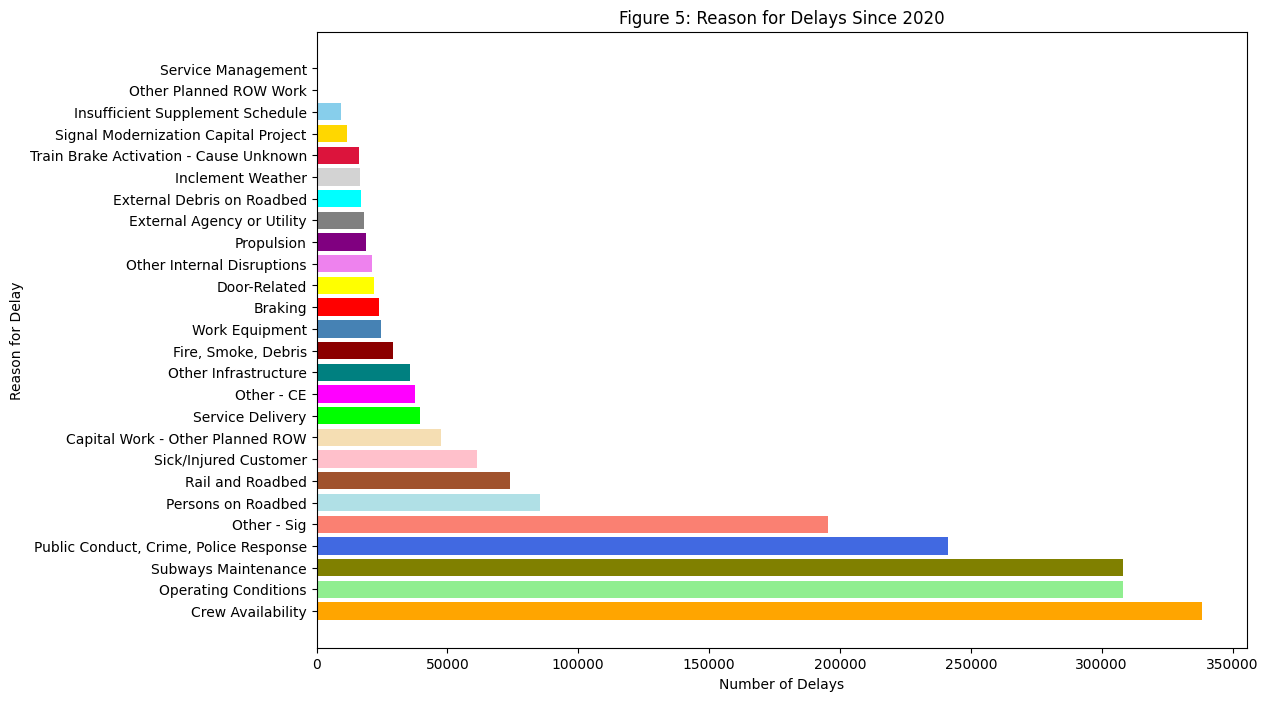

In [6]:
# create a bar chart chart
fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(subcategory_df['subcategory'], subcategory_df['delays'], color=[category_colors.get(cat, 'black') for cat in subcategory_df['subcategory']])
ax.set_xlabel('Number of Delays')
ax.set_ylabel('Reason for Delay')

plt.title(get_figure_label() + ": Reason for Delays Since 2020")


# Group the rows based on their delay subcategory and line, and create a stacked bar chart

In [7]:
# pivot the delay subcategory rows into columns
line_grouped = df.copy()
line_grouped = line_grouped.pivot(index=['month', 'day_type', 'line'], columns='subcategory', values='delays').fillna(0)
line_grouped['total_delays'] = line_grouped.sum(axis=1)

# sum the delays
line_grouped = line_grouped.groupby(['line']).sum().reset_index()

# sort by delays
line_grouped = line_grouped.sort_values('total_delays', ascending=False)
line_grouped.set_index('line', inplace=True)

#drop total_delays now
line_grouped = line_grouped.drop(columns=['total_delays'])

line_grouped


subcategory,Braking,Capital Work - Other Planned ROW,Crew Availability,Door-Related,External Agency or Utility,External Debris on Roadbed,"Fire, Smoke, Debris",Inclement Weather,Insufficient Supplement Schedule,Operating Conditions,...,Propulsion,"Public Conduct, Crime, Police Response",Rail and Roadbed,Service Delivery,Service Management,Sick/Injured Customer,Signal Modernization Capital Project,Subways Maintenance,Train Brake Activation - Cause Unknown,Work Equipment
line,,,,,,,,,,,,,,,,,,,,,
N,2684.0,3050.0,28351.0,3266.0,424.0,1806.0,2408.0,2380.0,1067.0,24770.0,...,2686.0,18933.0,6465.0,2838.0,0.0,2779.0,191.0,30455.0,1222.0,3087.0
A,1526.0,4196.0,28175.0,1874.0,8238.0,815.0,1933.0,1028.0,317.0,26427.0,...,1913.0,14853.0,4624.0,3177.0,0.0,3601.0,48.0,32163.0,930.0,1250.0
F,968.0,7123.0,24154.0,480.0,1197.0,542.0,1699.0,614.0,444.0,16247.0,...,683.0,12063.0,6842.0,1956.0,0.0,3389.0,3152.0,34155.0,823.0,1684.0
6,1837.0,1458.0,15132.0,2324.0,374.0,1320.0,2114.0,599.0,195.0,32135.0,...,1245.0,28541.0,4879.0,2814.0,194.0,7127.0,46.0,14902.0,836.0,1303.0
2,1406.0,2684.0,14374.0,867.0,915.0,1097.0,1998.0,1050.0,1512.0,30825.0,...,977.0,15944.0,4371.0,3202.0,0.0,5268.0,50.0,19592.0,1190.0,995.0
E,824.0,7661.0,14382.0,560.0,671.0,597.0,1620.0,11.0,500.0,14532.0,...,741.0,10613.0,5727.0,1877.0,0.0,3557.0,3580.0,32682.0,1334.0,1594.0
Q,1516.0,435.0,23194.0,1784.0,389.0,1571.0,1922.0,1728.0,515.0,18054.0,...,1419.0,13145.0,3662.0,2201.0,0.0,2350.0,54.0,16745.0,824.0,1312.0
D,981.0,1199.0,25510.0,1061.0,492.0,698.0,1322.0,822.0,474.0,14741.0,...,1198.0,12020.0,3156.0,2193.0,0.0,2053.0,53.0,20915.0,936.0,2612.0
4,1681.0,1088.0,14194.0,750.0,459.0,811.0,2026.0,452.0,436.0,18864.0,...,867.0,15878.0,3747.0,2442.0,0.0,5305.0,37.0,12136.0,962.0,1014.0


Text(0.5, 0, 'Subway Line')

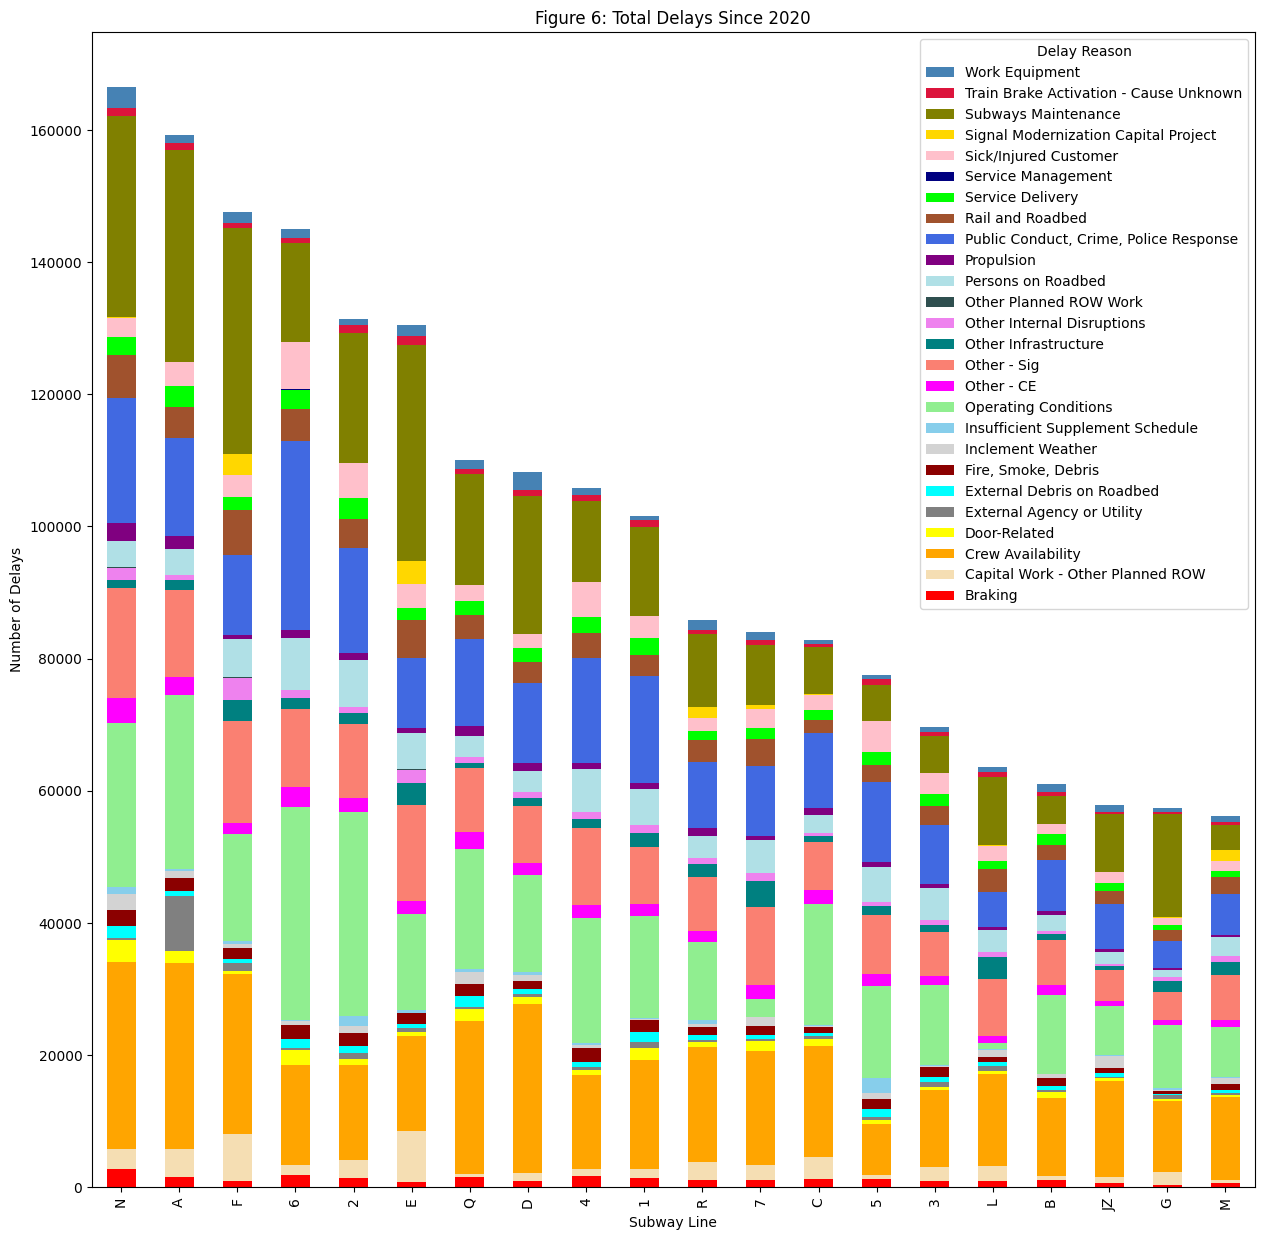

In [8]:
# Plot a stacked bargraph
fig, ax = plt.subplots(figsize=(15, 15))

line_grouped.plot(kind='bar', stacked=True, ax=ax, color=[category_colors[col] for col in line_grouped.columns])

# reverse the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title="Delay Reason")

plt.title(get_figure_label() + ": Total Delays Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Subway Line")

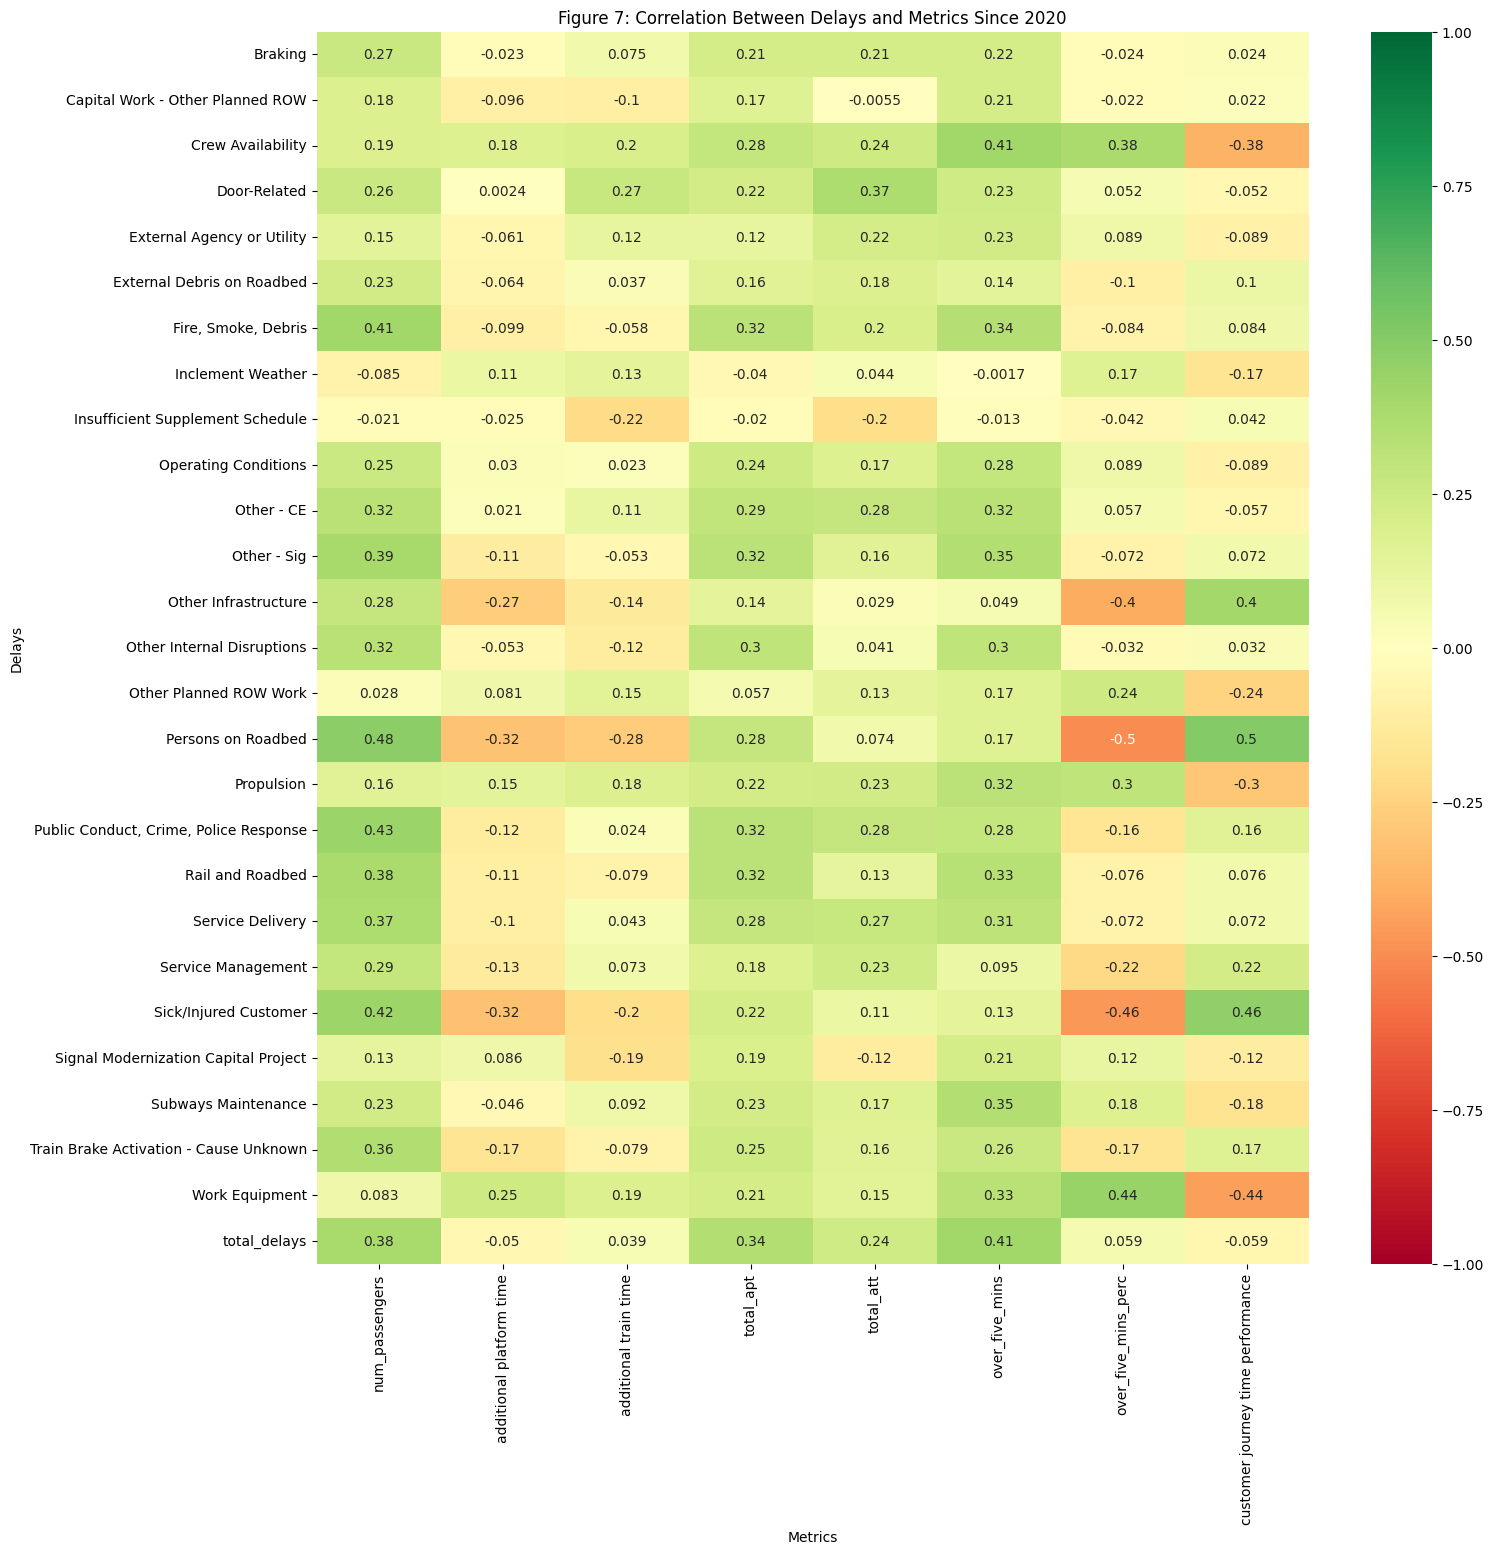

In [9]:
import seaborn as sns

#add a total_delays column
line_grouped_with_metrics = line_grouped.copy()
line_grouped_with_metrics['total_delays'] = line_grouped_with_metrics.sum(axis=1)

# merge the metrics with the delays
line_grouped_with_metrics = pd.merge(line_grouped_with_metrics, df_metrics, how='inner', on=['line'])

# plot the heatmap with delays on the x-axis and metrics on the y-axis
line_grouped_with_metrics.drop(columns=['month', 'line'], inplace=True)
corr = line_grouped_with_metrics.corr()

y_axis = list(line_grouped.columns) + ['total_delays']
x_axis = [col for col in line_grouped_with_metrics.columns if col not in y_axis]
fig, ax = plt.subplots(ncols=1, figsize=(16, 16))

plt.title(get_figure_label() + ": Correlation Between Delays and Metrics Since 2020")

sns.heatmap(corr.loc[y_axis, x_axis], vmin=-1, vmax=1, cmap='RdYlGn', annot=True, ax=ax)
plt.xlabel("Metrics")
plt.ylabel("Delays")
plt.show()


# Plot the metrics over time

In [10]:
# combine lines
df_avg_lines_metrics = df_metrics.groupby(['month']).mean(numeric_only=True).reset_index()

df_avg_lines_metrics = df_avg_lines_metrics.set_index('month')

df_avg_lines_metrics

,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
month,,,,,,,,
2020-01-01,9.819257e+06,1.275745,0.678111,6.277035e+06,3.284466e+06,746881.290066,0.154742,0.845258
2020-02-01,7.670390e+06,1.190679,0.637333,4.501346e+06,2.370965e+06,585103.184445,0.155294,0.844706
2020-03-01,4.142003e+06,1.182287,0.470000,2.416446e+06,8.965683e+05,290846.852602,0.143955,0.856045
2020-04-01,4.550047e+05,1.231182,-0.432345,2.532324e+05,-1.144598e+05,38533.673914,0.174351,0.825649
2020-05-01,8.005535e+05,0.658662,-0.423928,2.742603e+05,-1.884280e+05,52060.637335,0.128437,0.871563
2020-06-01,1.431457e+06,1.092892,-0.114959,7.786438e+05,-9.160656e+04,99605.962010,0.139302,0.860698
2020-07-01,1.789645e+06,1.197088,0.046767,1.062106e+06,2.317918e+04,132081.468274,0.147441,0.852559
2020-08-01,2.082459e+06,1.324029,0.077690,1.401970e+06,5.975046e+04,154832.931696,0.148239,0.851761
2020-09-01,2.127314e+06,1.139362,-0.020053,1.218744e+06,-4.897513e+04,147852.024833,0.139683,0.860317


Text(0.5, 0.98, 'Figure 8: Metrics Over Time Since 2020')

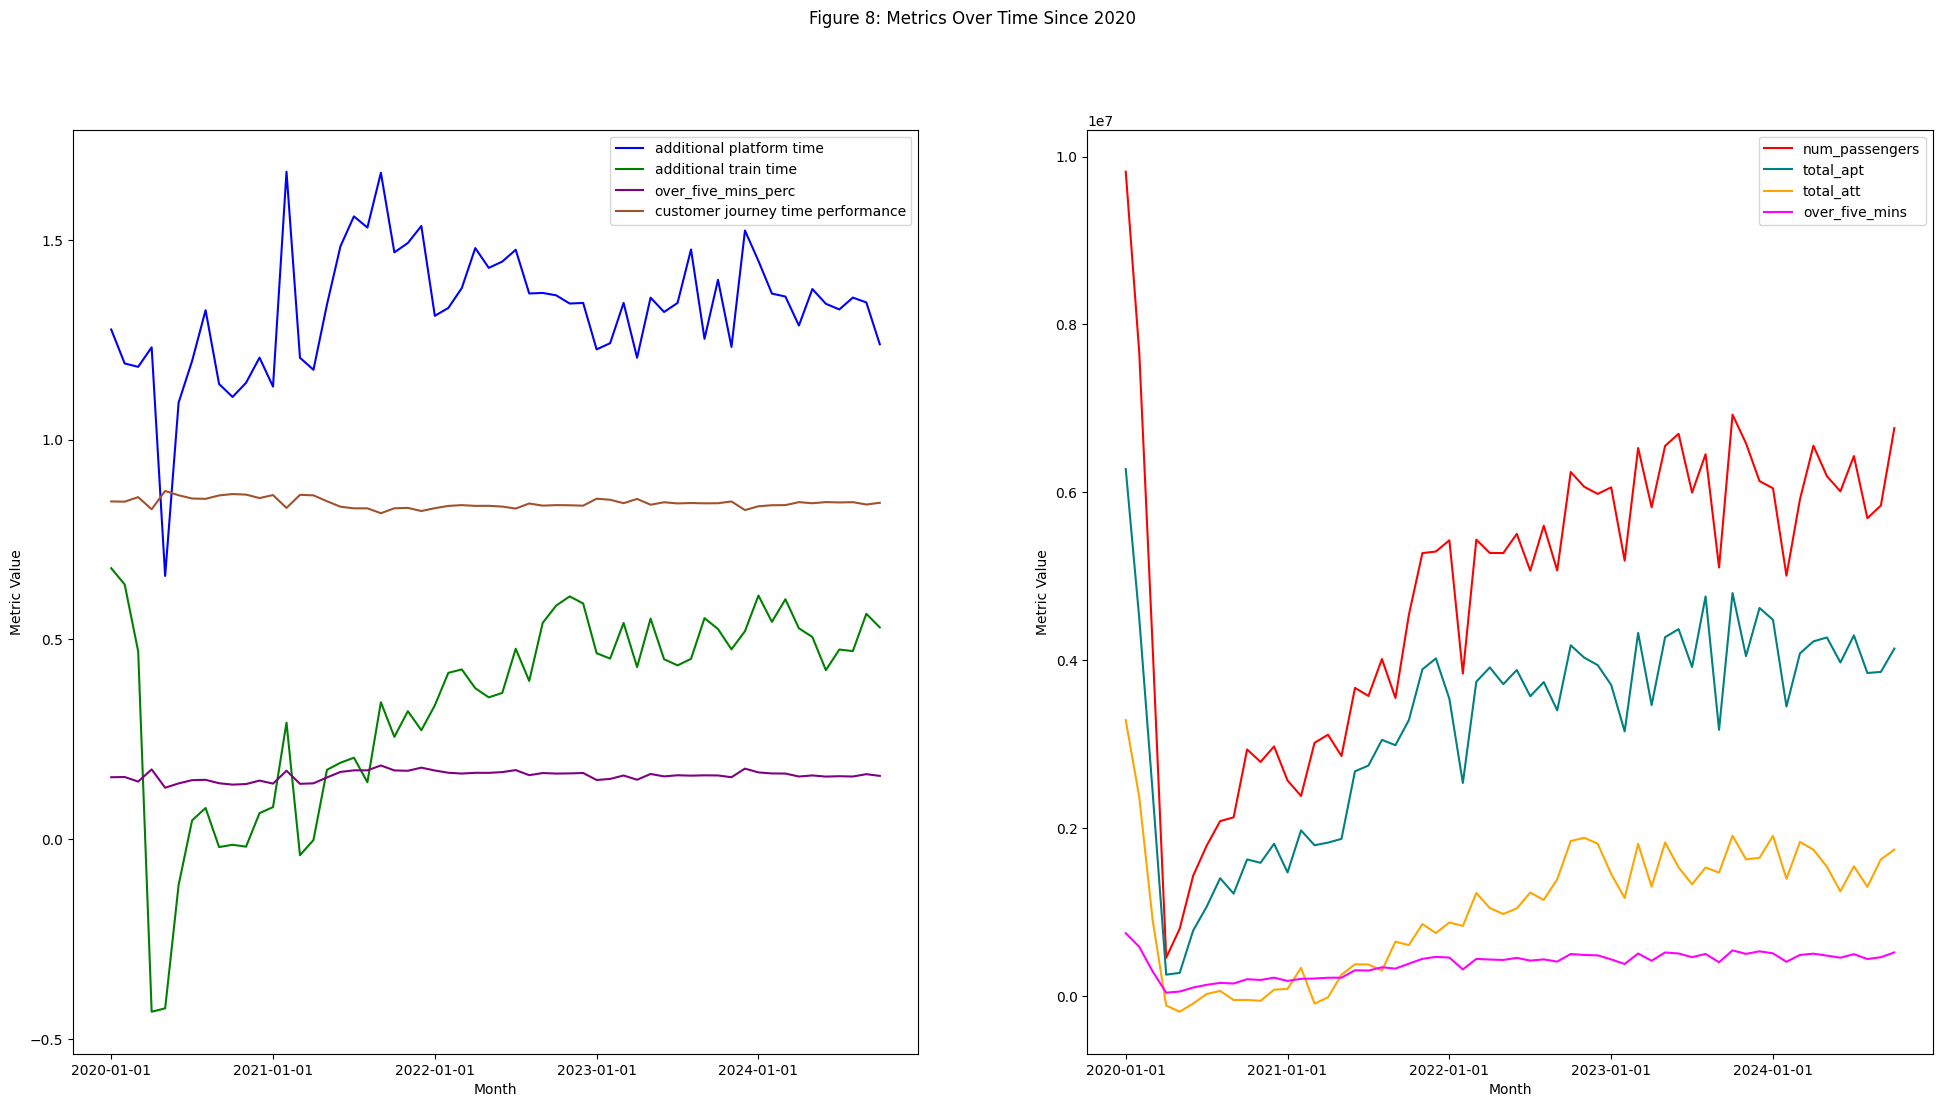

In [11]:


# create a time chart for big values
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
large_cols = ["num_passengers", "total_apt", "total_att", "over_five_mins"]
for col in df_avg_lines_metrics.columns:
    if col in large_cols:
        ax2.plot(df_avg_lines_metrics.index, df_avg_lines_metrics[col], label=col, color=metric_colors.get(col))
    else:
        ax1.plot(df_avg_lines_metrics.index, df_avg_lines_metrics[col], label=col, color=metric_colors.get(col))

ax1.set_xlabel('Month')
ax1.set_ylabel('Metric Value')
ax1.legend()

ax2.set_xlabel('Month')
ax2.set_ylabel('Metric Value')
ax2.legend()

ax1.set_xticks(np.arange(0, len(df_avg_lines_metrics.index), 12), df_avg_lines_metrics.index[::12])
ax2.set_xticks(np.arange(0, len(df_avg_lines_metrics.index), 12), df_avg_lines_metrics.index[::12])

fig.suptitle(get_figure_label() + ": Metrics Over Time Since 2020")


# Group the data by their month, sum the delays, and create a line chart

In [12]:
# group by month
monthly_df = df.groupby(['month']).sum()

# only keep month and delays
monthly_df = monthly_df[['delays']]

monthly_df

,delays
month,
2020-01-01,36876
2020-02-01,33648
2020-03-01,21341
2020-04-01,12390
2020-05-01,9141
2020-06-01,15397
2020-07-01,21924
2020-08-01,23406
2020-09-01,22887


Text(0.5, 0, 'Date')

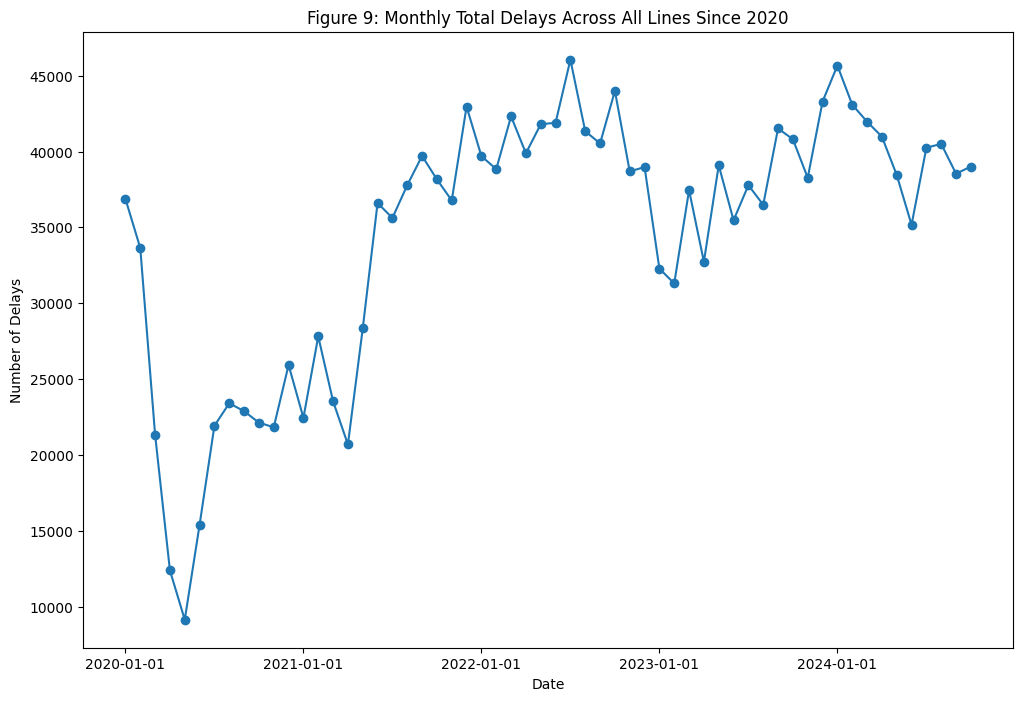

In [13]:
# plot the monthly delays
plt.figure(figsize=(12, 8))
plt.plot(monthly_df.index, monthly_df['delays'], marker='o')

# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(monthly_df.index), 12), monthly_df.index[::12])

plt.title(get_figure_label() + ": Monthly Total Delays Across All Lines Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Date")

# Group the data by their month and line, sum the delays within the line, and create a line chart

Text(0.5, 0, 'Date')

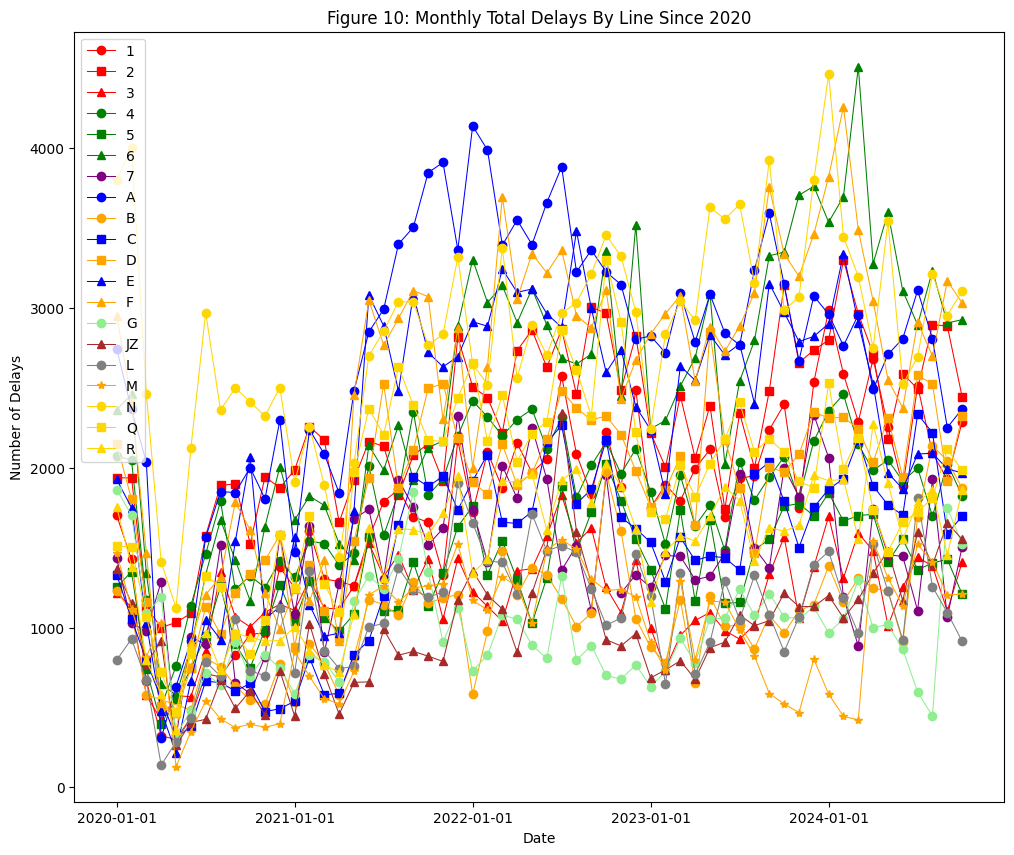

In [14]:
# plot each line's individual delays over time
plt.figure(figsize=(12, 10))

for line in df['line'].unique():
    line_df = df[df['line'] == line]
    monthly_df = line_df.groupby('month').sum()
    plt.plot(
        monthly_df.index, 
        monthly_df['delays'], 
        label=line, 
        marker=line_colors_shapes[line].shape, 
        color=line_colors_shapes[line].color,
        linewidth=0.75
    )

# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(monthly_df.index), 12), monthly_df.index[::12])

plt.legend(loc='upper left')
plt.title(get_figure_label() + ": Monthly Total Delays By Line Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Date")


# Plot each delay subcategory's count over time

Text(0.5, 0, 'Date')

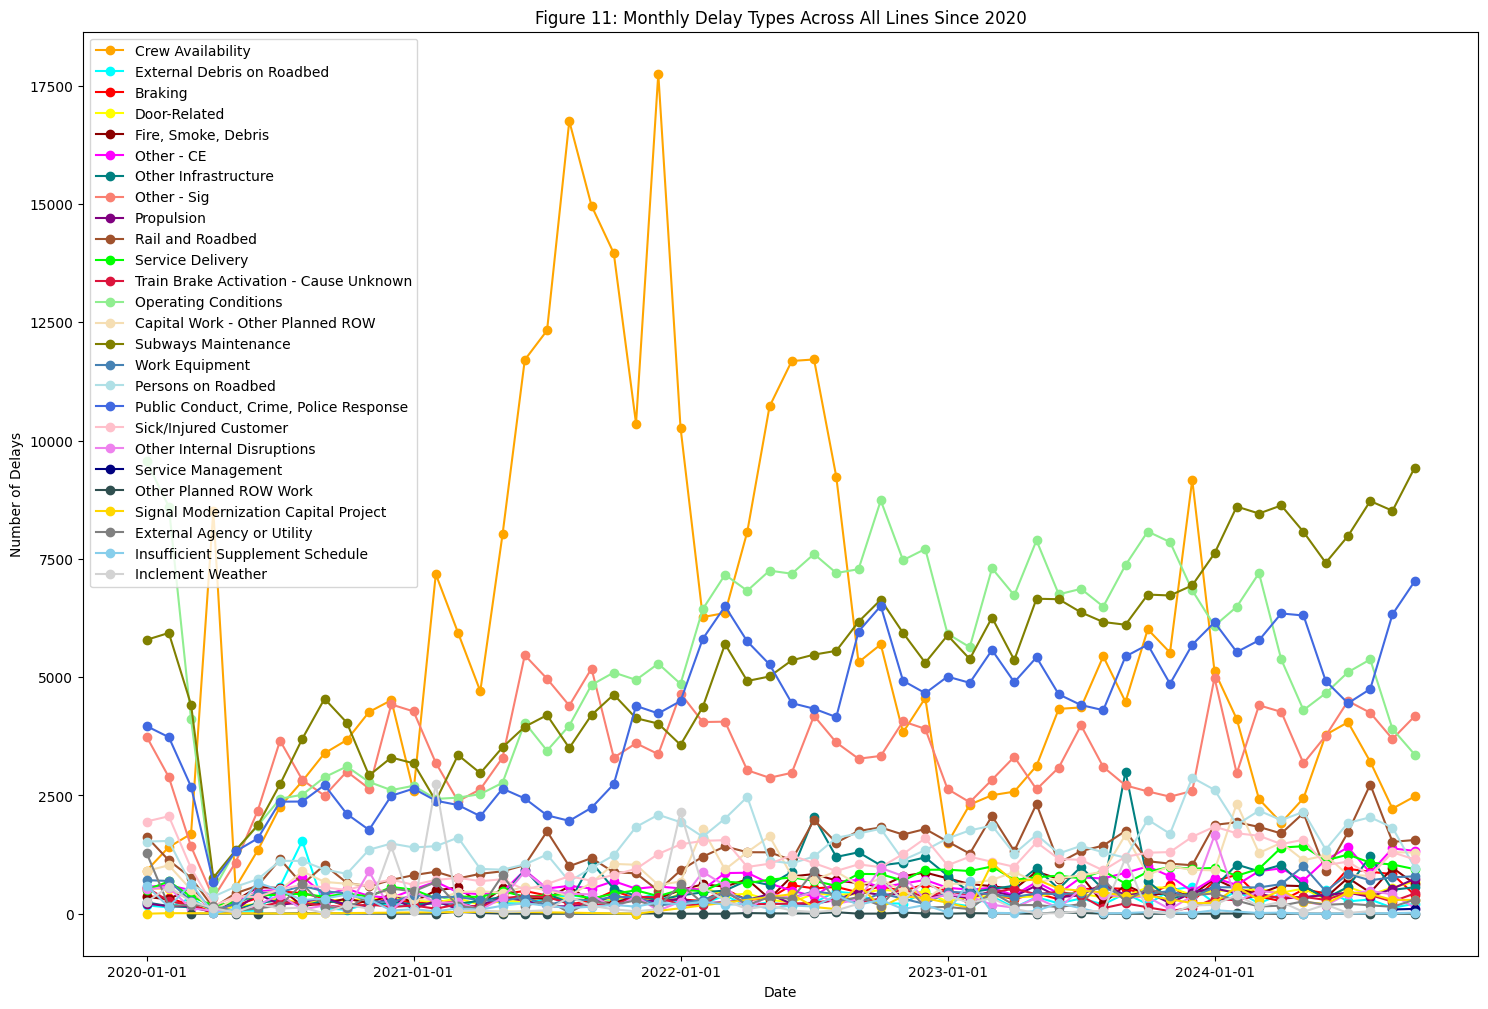

In [15]:
# plot each delay type
plt.figure(figsize=(18, 12))
for delay_type in df['subcategory'].unique():
    delay_type_df = df[df['subcategory'] == delay_type].groupby(['month']).sum()
    plt.plot(
        delay_type_df.index, 
        delay_type_df['delays'], 
        marker='o',
        label=delay_type,
        color=category_colors[delay_type],
    )



# on the x axis only show when the year changes
plt.xticks(np.arange(0, len(monthly_df.index), 12), monthly_df.index[::12])

plt.legend()
plt.title(get_figure_label() + ": Monthly Delay Types Across All Lines Since 2020")
plt.ylabel("Number of Delays")
plt.xlabel("Date")
